In [2]:
import numpy as np 
import matplotlib.pyplot as plt

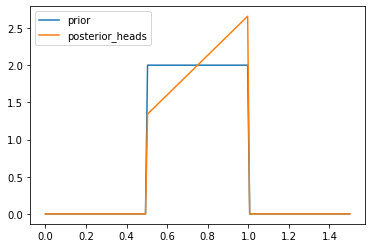

In [3]:
def prior(nums):
    out=[]
    for x in nums:
        if(.5<x and 1>x):
            out.append(2)
        else:
            out.append(0)
    return out
def posterior_heads(nums):
    out=[]
    for x in nums:
        if(.5<x and 1>x):
            out.append((8*x)/(3))
        else:
            out.append(0)    
    return out
def posterior_tails(nums):
    out=[]
    for x in nums:
        if(.5<x and 1>x):
            out.append(4*(2-x))
        else:
            out.append(0)    
    return out

x=np.linspace(0,1.5,150)
piror_y=prior(x)
plt.plot(x,piror_y, label="prior")
plt.plot(x,posterior_heads(x), label="posterior_heads")
plt.legend()

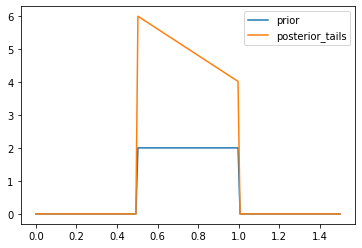

In [4]:
plt.plot(x,piror_y, label="prior")
plt.plot(x,posterior_tails(x), label="posterior_tails")
plt.legend()

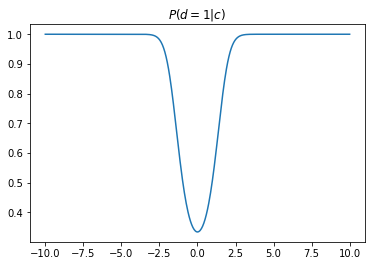

In [9]:
from scipy.stats import norm
def gausian_adjusted(x,sigma):
    out=[]
    for c in x:
        a=1/(np.sqrt(2*np.pi)*sigma)
        b=np.exp((-1)*(np.square(c)/(np.square(2*sigma))))
        #b=np.exp((-1/2)*((c/sigma)**2))
        out.append(a*b)        
    return np.array(out)
def condtional(x,sigma_0,sigma_1,theta):
    a=gausian_adjusted(x,sigma_1)*theta
    b=gausian_adjusted(x,sigma_0)*(1-theta)
    return a/((a+b))
import scipy.stats
def conditonal_test(x, theta,sigma_1,sigma_0):
    prob_density_1 = scipy.stats.norm(0, sigma_1)
    prob_density_0=scipy.stats.norm(0, sigma_0)
    out=[]
    for c in x:
        a=prob_density_1.pdf(c)
        b=prob_density_0.pdf(c)
        out.append(a/(a+b)) 
    return out

x=np.linspace(-10,10,500)
theta=.5
sigma_1=1
sigma_0=.5
y=condtional(x,sigma_0,sigma_1,theta)
y_not=conditonal_test(x,sigma_0,sigma_1,theta)
plt.title("$P(d=1|c)$ ")
plt.plot(x,y)
#plt.plot(x,y_not,label="theres")


